[*********************100%***********************]  1 of 1 completed
C:\Users\Jay Gan\AppData\Local\Temp\ipykernel_8360\1655030969.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  wti_data = wti_data.resample('H').mean()
C:\Users\Jay Gan\AppData\Local\Temp\ipykernel_8360\1655030969.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ercot_data = ercot_data.resample('H').mean()
C:\Users\Jay Gan\AppData\Local\Temp\ipykernel_8360\1655030969.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  wti_data['WTI_Pct_Change'] = wti_data['Close'].pct_change() * 100
C:\Users\Jay Gan\AppData\Local\Temp\ipykernel_8360\1655030969.py:30: FutureWarning: The default fill_method='pad' in Series.pct

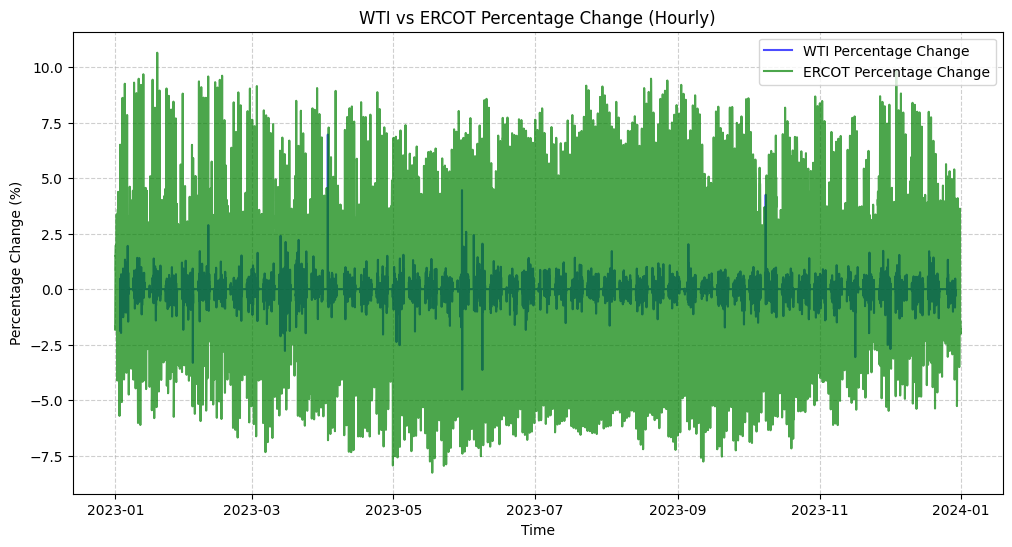

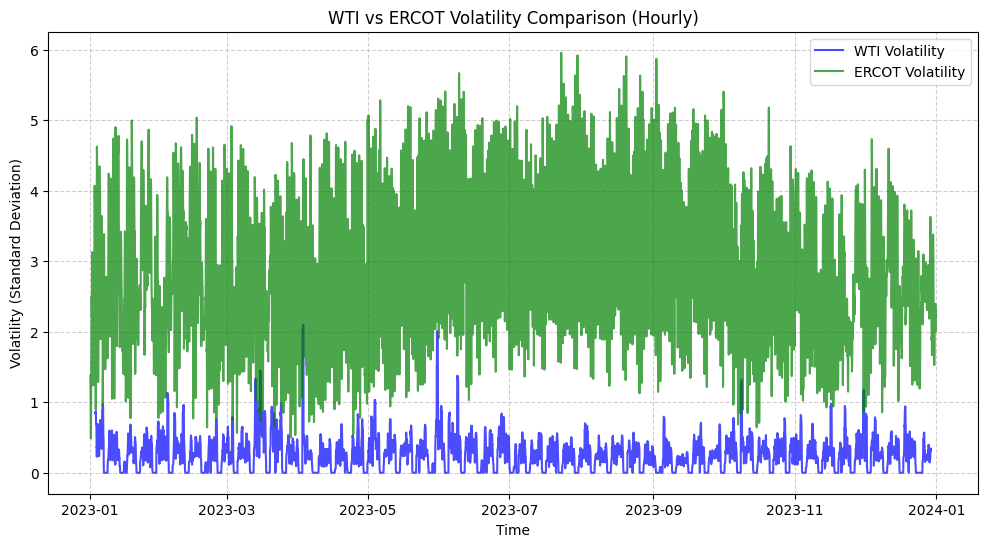

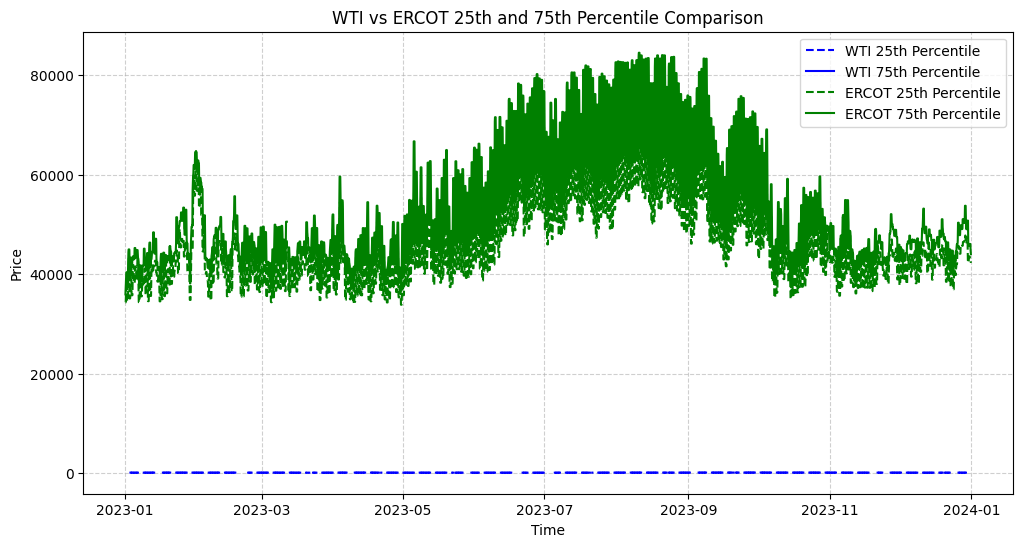

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


# Load ERCOT data from the provided Excel file
ercot_file_path = r'C:\Users\Jay Gan\Desktop\Project\STAT413\ERCOT_Price_Prediction_Stat_413_Final_Project\Data\LoadData2023.xlsx'
ercot_data = pd.read_excel(ercot_file_path, sheet_name='Sheet1', usecols=['Hour Ending', 'ERCOT'])

# Clean ERCOT data by fixing "24:00" and "DST" issues
ercot_data['Hour Ending'] = ercot_data['Hour Ending'].str.replace(' DST', '', regex=False)
ercot_data['Hour Ending'] = ercot_data['Hour Ending'].str.replace('24:00', '00:00')
ercot_data['Hour Ending'] = pd.to_datetime(ercot_data['Hour Ending'], format='%m/%d/%Y %H:%M')
ercot_data.loc[ercot_data['Hour Ending'].dt.hour == 0, 'Hour Ending'] += pd.Timedelta(days=1)
ercot_data.set_index('Hour Ending', inplace=True)

# Load WTI data from Yahoo Finance
ticker = 'CL=F'  # WTI Crude Oil futures symbol
start_date = '2023-01-01'
end_date = '2023-12-31'
wti_data = yf.download(ticker, start=start_date, end=end_date, interval='1h')

# Resample both datasets to ensure they align properly on hourly data
wti_data = wti_data.resample('H').mean()
ercot_data = ercot_data.resample('H').mean()

# Calculate percentage change for both WTI and ERCOT
wti_data['WTI_Pct_Change'] = wti_data['Close'].pct_change() * 100
ercot_data['ERCOT_Pct_Change'] = ercot_data['ERCOT'].pct_change() * 100

# Calculate volatility (rolling standard deviation) for both WTI and ERCOT
window_size = 12  # Example: 12-hour rolling window for volatility
wti_data['WTI_Volatility'] = wti_data['WTI_Pct_Change'].rolling(window=window_size).std()
ercot_data['ERCOT_Volatility'] = ercot_data['ERCOT_Pct_Change'].rolling(window=window_size).std()

# Calculate 25th and 75th percentiles (rolling quantiles)
wti_data['WTI_25th'] = wti_data['Close'].rolling(window=window_size).quantile(0.25)
wti_data['WTI_75th'] = wti_data['Close'].rolling(window=window_size).quantile(0.75)
ercot_data['ERCOT_25th'] = ercot_data['ERCOT'].rolling(window=window_size).quantile(0.25)
ercot_data['ERCOT_75th'] = ercot_data['ERCOT'].rolling(window=window_size).quantile(0.75)

# Plot the percentage change comparison
plt.figure(figsize=(12, 6))
plt.plot(wti_data.index, wti_data['WTI_Pct_Change'], label='WTI Percentage Change', color='blue', alpha=0.7)
plt.plot(ercot_data.index, ercot_data['ERCOT_Pct_Change'], label='ERCOT Percentage Change', color='green', alpha=0.7)
plt.title('WTI vs ERCOT Percentage Change (Hourly)')
plt.xlabel('Time')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot volatility comparison
plt.figure(figsize=(12, 6))
plt.plot(wti_data.index, wti_data['WTI_Volatility'], label='WTI Volatility', color='blue', alpha=0.7)
plt.plot(ercot_data.index, ercot_data['ERCOT_Volatility'], label='ERCOT Volatility', color='green', alpha=0.7)
plt.title('WTI vs ERCOT Volatility Comparison (Hourly)')
plt.xlabel('Time')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot quantile comparison (25th and 75th percentiles)
plt.figure(figsize=(12, 6))
plt.plot(wti_data.index, wti_data['WTI_25th'], label='WTI 25th Percentile', color='blue', linestyle='--')
plt.plot(wti_data.index, wti_data['WTI_75th'], label='WTI 75th Percentile', color='blue')
plt.plot(ercot_data.index, ercot_data['ERCOT_25th'], label='ERCOT 25th Percentile', color='green', linestyle='--')
plt.plot(ercot_data.index, ercot_data['ERCOT_75th'], label='ERCOT 75th Percentile', color='green')
plt.title('WTI vs ERCOT 25th and 75th Percentile Comparison')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




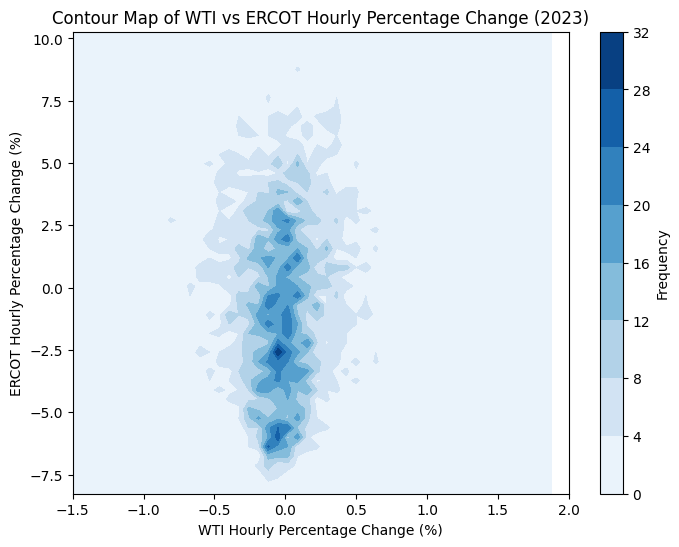

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Remove timezone information from both WTI and ERCOT data to make them timezone-naive
wti_data.index = wti_data.index.tz_localize(None)
ercot_data.index = ercot_data.index.tz_localize(None)

# Remove any duplicate timestamps from both datasets
wti_data = wti_data[~wti_data.index.duplicated(keep='first')]
ercot_data = ercot_data[~ercot_data.index.duplicated(keep='first')]

# Calculate percentage change for both WTI and ERCOT
wti_data['WTI_Pct_Change'] = wti_data['Close'].pct_change(fill_method=None) * 100
ercot_data['ERCOT_Pct_Change'] = ercot_data['ERCOT'].pct_change(fill_method=None) * 100

# Remove NaN values that result from pct_change calculation
wti_pct_change = wti_data['WTI_Pct_Change'].dropna()
ercot_pct_change = ercot_data['ERCOT_Pct_Change'].dropna()

# Align both datasets based on their indexes (timestamps) for comparison
aligned_data = pd.concat([wti_pct_change, ercot_pct_change], axis=1, join='inner')
aligned_data.columns = ['WTI_Pct_Change', 'ERCOT_Pct_Change']

# Filter the data to restrict the WTI percentage change to the range of -1.5% to 2%
aligned_data = aligned_data[(aligned_data['WTI_Pct_Change'] >= -1.5) & (aligned_data['WTI_Pct_Change'] <= 2)]

# Prepare the data for the contour map
x = aligned_data['WTI_Pct_Change']
y = aligned_data['ERCOT_Pct_Change']

# Create a 2D histogram for the contour map
plt.figure(figsize=(8, 6))
hist, xedges, yedges = np.histogram2d(x, y, bins=50)

# Plot the contour map
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(X, Y, hist.T, cmap='Blues')

# Add colorbar, labels, and title
plt.colorbar(label='Frequency')
plt.title('Contour Map of WTI vs ERCOT Hourly Percentage Change (2023)')
plt.xlabel('WTI Hourly Percentage Change (%)')
plt.ylabel('ERCOT Hourly Percentage Change (%)')

# Set narrower x-axis limits from -1.5% to 2%
plt.xlim([-1.5, 2])

# Show the plot
plt.show()
